# <center>`PYNEP`<center> <br> <center>A module for nonlinear eigenvalue problems<center>

This modules contains data structure and functions for defining and solving Nonlinear Eigenvalue Problems (NEP). 

The nonlinear eigenvalue problem can be defined in the following way. Given an holomorfic function 
\begin{equation*}
M:\mathbb{C} \rightarrow \mathbb{C}^{n \times n}
\end{equation*}
compute $(\lambda,v)\in \mathbb{C} \times \mathbb{C}^{n}$ such that 
\begin{equation*}
M(\lambda)v=0
\end{equation*}
The complex number $\lambda$ is the eigenvalue and the vector $v$ is the eigenvector.

## Examples and applications
Some examples of nonlinear eigenvalue problems follow:
- Classic eigenvalue problem.
\begin{equation*}
M(\lambda)=A-\lambda I
\end{equation*}
Notice that in this case $M(\lambda)v=0$ is equivalent to $Av=\lambda v$ that is the standard eigenvalue problem

- Polynomial Eivenvalue Problem (PEP)
\begin{equation*}
M(\lambda)= A_0 + \lambda A_1 + \lambda^2 A_2 + \dots + \lambda^d A_d
\end{equation*}
Such problems arise for example in the computation of the natural modes of vibration of a structure, vibro-acoustics and fluid dynamics.

- Delay Eigenvalue Problem (DEP)
\begin{equation*}
M(\lambda)= -\lambda I + A_0 + e^{-\lambda} A_1
\end{equation*}
Such problems arise in the study of the stability for Partial Delay Differential Equations (PDDE)

## Algorithms for solving nonlinear eigenvalue problems
This module contains the implementation of three methods for solving nonlinear eigenvalue problems: *Infinite Arnoldi method, residual inverse iteration and companion approximation method*.

In the current implementation, each method has the following features

| Infinite Arnoldi              | Residual inverse iteration   | Companion approximation method |
|:-------------------------------|:------------------------------|:--------------------------------|
| Computes several eigenpairs with eigenvalue close to zero | Compute one eigenpair  with eigenvalue close to $\sigma$ |Computes several eigenpairs with eigenvalue close to zero |
| Requires access to high order derivatives in zero $M^{(j)}(0)$ | Requires access to the first derivative $M'(\lambda)$ | Requires access to high order derivatives in zero $M^{(j)}(0)$ |
| Solves a generic nonlinear eigenvalue problem | Solves a generic nonlinear eigenvalue problem | Solves only polynomial eigenvalue problems. |





## Definition and operations on a nonlinear eigenvalue problem: `nep_classes` and  `nep_solvers`
The `pynep` has two main classes: one for nonlinear eigenvalue problems `nep` and one for polynomial eigenvalue problems `pep`. The class `pep` is a subclass of `nep`.

The `pep` is defined by the coefficients $A_0, A_1, \dots, A_d$. These matrices have to be the stored in a three dimensional array. Here we define as example `pep`.


In [1]:
import numpy as np
import nep_classes
# define the coefficients
A0=np.matrix('1 0; 2 1'); A1=np.matrix('-2 1; 1 3'); A2=np.matrix('1 1; 3 1');
# store them in a three dimensional array
coeff=np.zeros((2,2,3));  coeff[:,:,0]=A0; coeff[:,:,1]=A1; coeff[:,:,2]=A2;
P=nep_classes.pep(coeff)

The `nep` is defined by three functions (one optional). More precisely it are required the functions: 

- Main function evaluation $\lambda \rightarrow M(\lambda)$
- Derivatives in zero $j \rightarrow M^{(j)}(0)$ 
- Derivative (optional) $\lambda \rightarrow M'(\lambda)$

Here we define as example of `nep` a random delay eigenvalue problem.

In [2]:
# generate coefficients matrix
n=10; A0=np.random.random((n,n)); A1=np.random.random((n,n))

# function evaluation
def Meval_dep(l):
    return -l*np.eye(n)+A0+A1*np.exp(-l)
# first derivative
def Mpeval_dep(l):
    return -np.eye(n)-A1*np.exp(-l)
# high order derivatives in zero
def Md_dep(i):
    if i==0:
        return A0+A1
    elif i==1:
        return -np.eye(n)-A1
    else:
        return ((-1)**i)*A1
# create the nonlinear eigenvalue problem    
M_dep=nep_classes.nep(Meval_dep, Md_dep, Mpeval_dep)

A `pep` can be converted to a `nep`. By calling the function `pep2nep` in the module `nep_solvers`:

In [3]:
import nep_solvers
P_nep=nep_solvers.pep2nep(P)

A `nep` can be approximated by a `pep` (of degree `d`) by truncating the Taylor series by using the function `generate_pep_approximation`: 

In [4]:
# approximatio with a polynomial of degree 10
P_dep=nep_solvers.generate_pep_approximation(M_dep,10)

# Solve nonlinear eigenvalue problems
We are now ready to solve the nonlinear eigenvalue problems defined in the previous section. We start by solving the delay eigenvalue problem with the Infinite Arnoldi method.

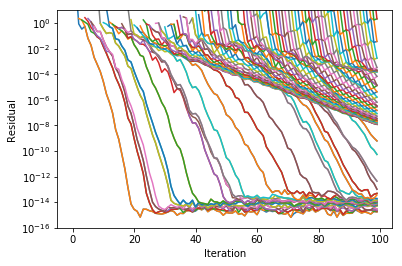

In [5]:
# perform 100 steps of Infinite Arnoldi 
# and plot the convergence history (verbose=1)
l, v = nep_solvers.iar(M_dep,100,verbose=1)

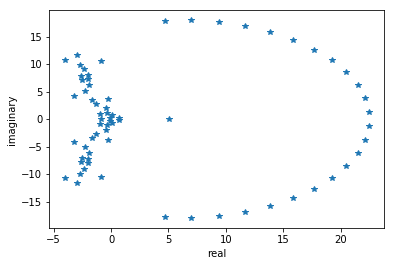

In [6]:
# plot the computed eigenvalues
import matplotlib.pyplot as plt
plt.plot(l.real,l.imag,'*')
plt.xlabel('real')
plt.ylabel('imaginary') 
plt.show()

## Compare the Infinite Arnoldi method and the companion method on a Delay eigenvalue problem

We now want to solve a delay eigenvalue problem, randomly generated, with iar and with the companion-approximation method. We want to compare the results. As first step we import the modules that we will need in order to define the problem.

In [7]:
import nep_classes
import nep_solvers
import numpy as np
import math

Define the delay eigenvalue problem
\begin{equation*}
M(\lambda)=-\lambda I + A_0+e^{-\lambda}A_1 
\end{equation*}

In [8]:
# generate coefficients matrix
n=10; A0=np.random.random((n,n)); A1=np.random.random((n,n))

# function evaluation
def Meval_dep(l):
    return -l*np.eye(n)+A0+A1*np.exp(-l)
# first derivative
def Mpeval_dep(l):
    return -np.eye(n)-A1*np.exp(-l)
# high order derivatives in zero
def Md_dep(i):
    if i==0:
        return A0+A1
    elif i==1:
        return -np.eye(n)-A1
    else:
        return ((-1)**i)*A1
# create the nonlinear eigenvalue problem    
M_dep=nep_classes.nep(Meval_dep, Md_dep, Mpeval_dep)

Run Infinite Arnoldi with 100 steps

In [9]:
l, _=nep_solvers.iar(M_dep,50)

Approximate the delay eigenvalue problem with a polynomial eigenvalue problem with degree 10 and use the companion solver

In [10]:
P=nep_solvers.generate_pep_approximation(M_dep,10)
ll,_=nep_solvers.companinon_solver(P)

Plot the results

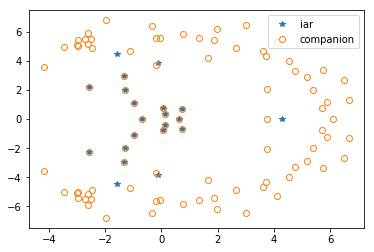

In [11]:
import matplotlib.pyplot as plt
plt.plot(l.real,l.imag,'*',label="iar")
plt.plot(ll.real,ll.imag,'o',markerfacecolor='none',label="companion")
plt.legend(); plt.show()

## Use residual inverse iteration to obtain a better eigenpair approximation

Let us not consider the polynomial eigenvalue problem
\begin{equation*}
M(\lambda)= A_0 + \lambda A_1 + \lambda^2 A_2 + \dots + \lambda^d A_d
\end{equation*}
We consider $d=10$, $n=20$ and the matrices randomly generated.

In [12]:
# generate coefficients matrix
d=10; n=20; coeff=np.zeros((n,n,d))
for i in range(10):
    coeff[:,:,i]=np.random.random((n,n));
P=nep_classes.pep(coeff)

Solve the problem with the infinite Arnoldi method

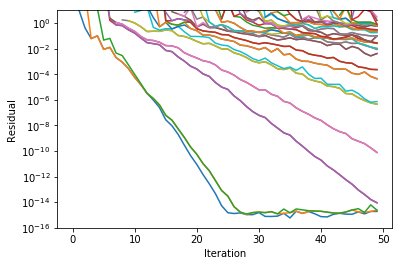

In [13]:
l,v = nep_solvers.iar(P,50,verbose=1)

Convert the polynomial eigenvalue problem to a standard nonlinear eigenvalue problem format

In [14]:
P=nep_solvers.pep2nep(P)

Check the residual of the last eigenpair

In [15]:
k=l.shape[0]-1
print("value",k)
print("eigenvalue",l[k])

value 9
eigenvalue (0.414178072576+0.363068002494j)


In [16]:
from scipy.linalg import norm
print("Reminder=",norm(P.Meval(l[k]).dot(v[:,k:k+1])))

Reminder= 4.61020435555e-07


Improve the eigenpair approximation by using the residual inverse iteration method.

In [17]:
ll,vv=nep_solvers.res_inv(P,l[k],verbose=1)

Residual at iteration  0 is  4.64175374301e-07
Residual at iteration  1 is  3.79384947248e-10
Residual at iteration  2 is  5.43412288184e-13
Residual at iteration  3 is  1.35190062314e-15
Residual at iteration  4 is  3.16958997211e-15
Residual at iteration  5 is  1.49201144878e-15
Residual at iteration  6 is  1.58553725704e-15
Residual at iteration  7 is  1.04142516933e-15
Residual at iteration  8 is  1.76097674863e-15
Residual at iteration  9 is  1.16288725024e-15
